In [2]:
MODEL_GB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model\GB.pkl"
MODEL_RF = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model\RF.pkl"
MODEL_DT = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model\DT.pkl"
MODEL_ET = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model\ET.pkl"
MODEL_AdaB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model\AdaB.pkl"

In [3]:
MODEL_GB_1 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model_Optimized\GB.pkl"
MODEL_RF_1 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model_Optimized\RF.pkl"
MODEL_DT_1 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model_Optimized\DT.pkl"
MODEL_ET_1 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model_Optimized\ET.pkl"
MODEL_AdaB_1 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\Model_Optimized\AdaB.pkl"

In [3]:
DATA = r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\UNSW-NB15\label_combined.csv'

### Hard

Confusion Matrix:
[[16980  1695]
 [ 1418 31442]]
Accuracy: 0.9396
Log Loss: 2.0978
AUC: 0.93304209


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


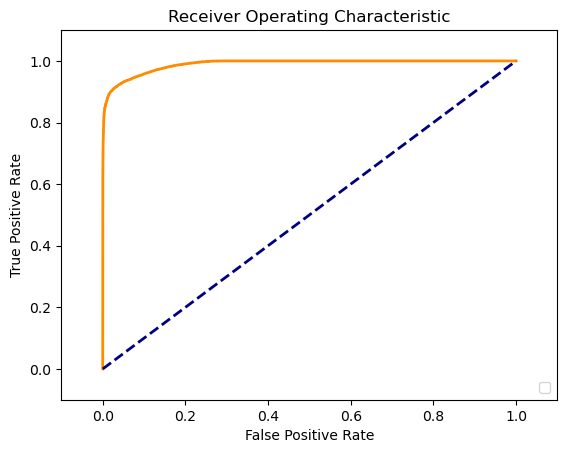

In [29]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = []
    for model in models:
        prediction = model.predict(data)
        predictions.append(prediction.astype(int))  # Convert predictions to integers
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models1 = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models1, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models1[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))
    
        # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models1], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT,MODEL_ET,MODEL_RF,MODEL_GB,MODEL_AdaB] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)

Confusion Matrix:
[[16980  1695]
 [ 1418 31442]]
Accuracy: 0.9396
AUC: 0.9330
Log Loss: 2.0978


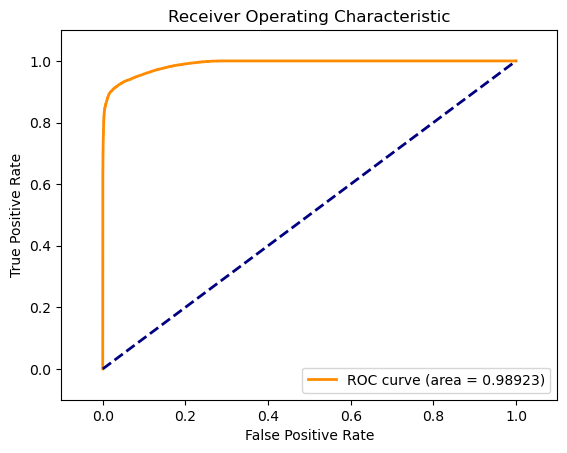

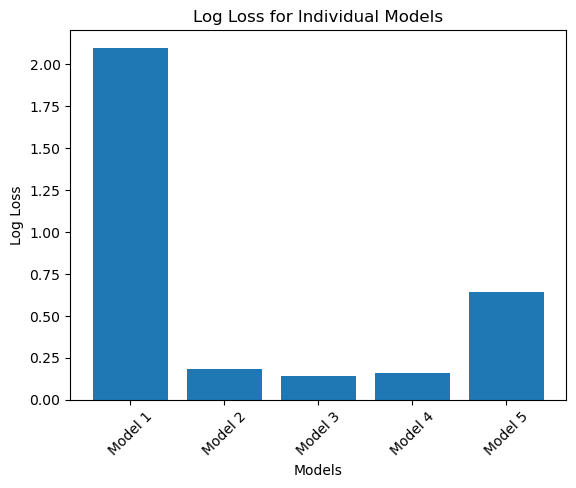

In [26]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_log_loss(models, X_test, y_test):
    model_names = ["Model {}".format(i) for i in range(1, len(models) + 1)]
    log_losses = [log_loss(y_test, model.predict_proba(X_test)) for model in models]

    plt.figure()
    plt.bar(model_names, log_losses)
    plt.xlabel('Models')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Individual Models')
    plt.xticks(rotation=45)
    plt.show()




def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = np.array([model.predict(data) for model in models])
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)
    y = dataset['label']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models, X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, final_predictions)

    # Calculate AUC
    roc_auc = roc_auc_score(y_test, final_predictions)

    # Calculate log loss using one of the models
    logloss = log_loss(y_test, models[0].predict_proba(X_test))

    # Print evaluation metrics
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("AUC: {:.4f}".format(roc_auc))
    print("Log Loss: {:.4f}".format(logloss))

    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    fpr, tpr, _ = roc_curve(y_test, ensemble_probs[:, 1])
    roc_auc_ensemble = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc_ensemble)
    # Inside your main function after calculating log loss
    plot_log_loss(models, X_test, y_test)

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT,MODEL_ET,MODEL_RF,MODEL_GB,MODEL_AdaB] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


In [8]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = []
    for model in models:
        prediction = model.predict(data)
        predictions.append(prediction.astype(int))  # Convert predictions to integers
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT_1,MODEL_ET_1,MODEL_RF_1,MODEL_GB_1,MODEL_AdaB_1] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)

Confusion Matrix:
[[15861  2814]
 [ 1746 31114]]
Accuracy: 0.9115
Log Loss: 0.6294
AUC: 0.89809138


### Soft

Confusion Matrix:
[[16891  1784]
 [ 1463 31397]]
Accuracy: 0.9370
Log Loss: 2.0978
AUC: 0.92997450


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


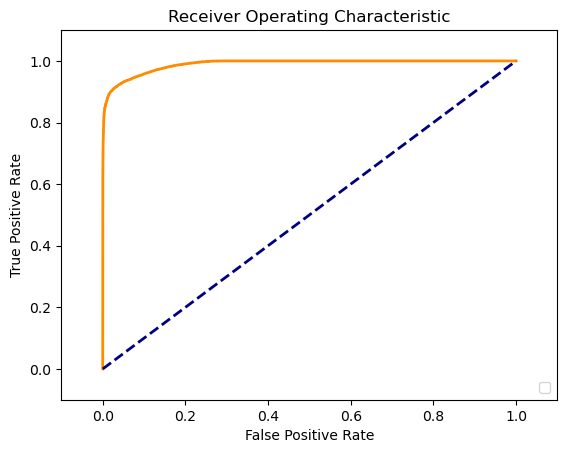

In [30]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_soft_voting(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions
    final_predictions = np.mean(predictions, axis=0)  # Calculate the mean probabilities
    return np.argmax(final_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models2 = load_models(model_paths)

    # Make predictions using soft voting on the test set
    final_predictions = ensemble_soft_voting(models2, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models2[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))
    
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models2], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT,MODEL_ET,MODEL_RF,MODEL_GB,MODEL_AdaB]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


In [14]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_soft_voting(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions
    final_predictions = np.mean(predictions, axis=0)  # Calculate the mean probabilities
    return np.argmax(final_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using soft voting on the test set
    final_predictions = ensemble_soft_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT_1,MODEL_ET_1,MODEL_RF_1,MODEL_GB_1,MODEL_AdaB_1]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


Confusion Matrix:
[[16071  2604]
 [ 1453 31407]]
Accuracy: 0.9213


### Bayesian Model Average 

Confusion Matrix:
[[17021  1654]
 [ 1401 31459]]
Accuracy: 0.9407
Log Loss: 0.4146
AUC: 0.93439849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


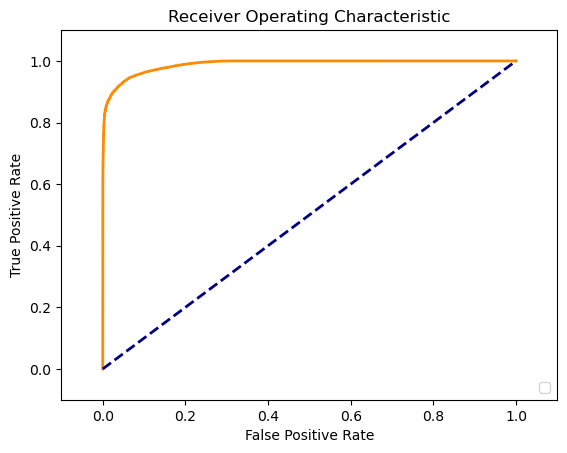

In [31]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths, X_train, y_train):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        # Calibrate the model to obtain probability estimates
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        models.append(calibrated_model)
    return models

def ensemble_bma(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions
    final_predictions = np.mean(predictions, axis=0)  # Calculate the mean probabilities
    return np.argmax(final_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models and calibrate them for BMA
    models = load_models(model_paths, X_train, y_train)

    # Make predictions using Bayesian Model Averaging on the test set
    final_predictions = ensemble_bma(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))
    
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT,MODEL_ET,MODEL_RF,MODEL_GB,MODEL_AdaB]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


In [16]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

def load_models(model_paths, X_train, y_train):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        # Calibrate the model to obtain probability estimates
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        models.append(calibrated_model)
    return models

def ensemble_bma(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions
    final_predictions = np.mean(predictions, axis=0)  # Calculate the mean probabilities
    return np.argmax(final_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models and calibrate them for BMA
    models = load_models(model_paths, X_train, y_train)

    # Make predictions using Bayesian Model Averaging on the test set
    final_predictions = ensemble_bma(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT_1,MODEL_ET_1,MODEL_RF_1,MODEL_GB_1,MODEL_AdaB_1]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


Confusion Matrix:
[[16004  2671]
 [ 1796 31064]]
Accuracy: 0.9133


### Dynamic

Confusion Matrix:
[[17021  1654]
 [ 1401 31459]]
Accuracy: 0.9407
Log Loss: 0.4146
AUC: 0.93439849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


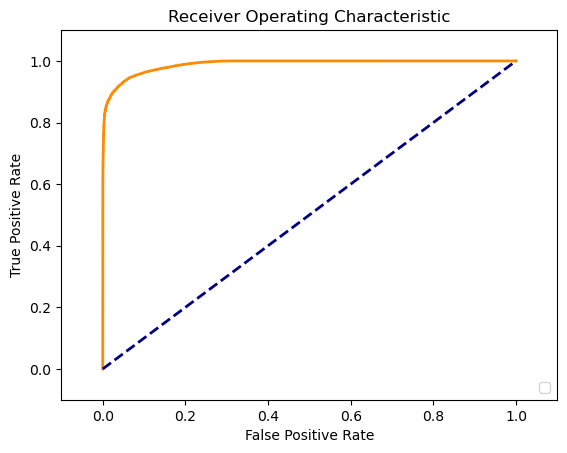

In [32]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths, X_train, y_train):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        # Calibrate the model to obtain probability estimates
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        models.append(calibrated_model)
    return models

def ensemble_dynamic_voting(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions

    # Calculate confidence scores for each model's predictions
    confidence_scores = np.max(predictions, axis=0)

    # Calculate instance-wise weights for each model's predictions
    instance_weights = np.mean(confidence_scores, axis=1)

    # Apply instance-wise weights to the predictions
    weighted_predictions = np.sum(np.array(predictions) * instance_weights[:, np.newaxis], axis=0)

    return np.argmax(weighted_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models and calibrate them for dynamic voting
    models = load_models(model_paths, X_train, y_train)

    # Make predictions using dynamic voting on the test set
    final_predictions = ensemble_dynamic_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Log Loss: {:.4f}".format(logloss))
    print("AUC: {:.8f}".format(auc))
    
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT,MODEL_ET,MODEL_RF,MODEL_GB,MODEL_AdaB]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)

In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

def load_models(model_paths, X_train, y_train):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        # Calibrate the model to obtain probability estimates
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        models.append(calibrated_model)
    return models

def ensemble_dynamic_voting(models, data):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions

    # Calculate confidence scores for each model's predictions
    confidence_scores = np.max(predictions, axis=0)

    # Calculate instance-wise weights for each model's predictions
    instance_weights = np.mean(confidence_scores, axis=1)

    # Apply instance-wise weights to the predictions
    weighted_predictions = np.sum(np.array(predictions) * instance_weights[:, np.newaxis], axis=0)

    return np.argmax(weighted_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models and calibrate them for dynamic voting
    models = load_models(model_paths, X_train, y_train)

    # Make predictions using dynamic voting on the test set
    final_predictions = ensemble_dynamic_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_DT_1,MODEL_ET_1,MODEL_RF_1,MODEL_GB_1,MODEL_AdaB_1]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


Confusion Matrix:
[[16004  2671]
 [ 1796 31064]]
Accuracy: 0.9133


### Weighted Average

In [40]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

def load_models(model_paths, X_train, y_train):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        # Calibrate the model to obtain probability estimates
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        models.append(calibrated_model)
    return models

def ensemble_weighted_voting(models, data, weights):
    predictions = []
    for model in models:
        prediction_probabilities = model.predict_proba(data)
        predictions.append(prediction_probabilities)  # Store the probability distributions

    # Convert weights to a numpy array
    weights_array = np.array(weights)

    # Apply weights to the predictions
    weighted_predictions = np.sum(np.array(predictions) * weights_array[:, np.newaxis, np.newaxis], axis=0)

    return np.argmax(weighted_predictions, axis=1)

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('label', axis=1)  
    y = dataset['label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models and calibrate them for weighted voting
    models = load_models(model_paths, X_train, y_train)

    # Define the weights for each model's prediction
    weights = [0.35, 0.25, 0.2, 0.15, 0.05]  # Replace these values with your chosen weights

    # Make predictions using weighted voting on the test set
    final_predictions = ensemble_weighted_voting(models, X_test, weights)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))

if __name__ == "__main__":
    dataset_path = DATA
    model_paths = [MODEL_RF_1,MODEL_ET_1,MODEL_DT_1,MODEL_AdaB_1,MODEL_GB_1]  # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)


Confusion Matrix:
[[15959  2716]
 [ 1885 30975]]
Accuracy: 0.9107
